In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import yaml
import asdf
import random
import gc
import scipy as sc
import os
import abacusnbody
print(os.path.dirname(abacusnbody.__file__))

plt.rcParams['axes.labelsize']        = 12
plt.rcParams['axes.titlesize']        = 12
plt.rcParams['xtick.labelsize']       = 12
plt.rcParams['ytick.labelsize']       = 12
plt.rcParams['font.family']           = 'serif'
plt.rcParams['font.size']             = 12


/Users/alexabartlett/opt/anaconda3/lib/python3.9/site-packages/abacusnbody


The aim of this notebook is to showcase the our ZCV implementation in AbacusHOD.

In [4]:
kk, pk_000_gm_zcv = np.loadtxt('abacus_spectra/pk_000_gm_zcv.txt', unpack=True)
kk, pk_000_gm = np.loadtxt('abacus_spectra/pk_000_gm.txt', unpack=True)
kk, ZeNBu_pred_cross = np.loadtxt('abacus_spectra/ZeNBu_pred_cross.txt', unpack=True)
kk, pk_gm_avg = np.loadtxt('abacus_spectra/pk_gm_avg.txt', unpack=True)
kk, pk_gm_errs = np.loadtxt('abacus_spectra/pk_gm_errs.txt', unpack=True)

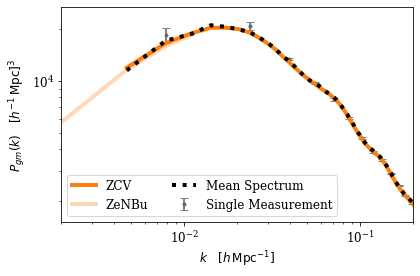

In [12]:
plt.figure(figsize=(6,4))

idx = np.arange(2,265)[::5]

plt.loglog(kk[1:], pk_000_gm_zcv, lw=4, c='tab:orange', label=r'ZCV')
plt.loglog(kk[:4], ZeNBu_pred_cross, c='tab:orange', alpha=0.3, lw=4, label='ZeNBu')
plt.loglog(kk[1:], pk_gm_avg, c='k', ls=':', lw=4, label=r'Mean Spectrum')
plt.errorbar(kk[idx], pk_000_gm[idx], yerr=pk_gm_errs[idx], fmt='.', 
             elinewidth=2, capsize=4, ecolor='grey', c='dimgrey', zorder=0, label=r'Single Measurement')

plt.xlim(2e-3, 0.2)
plt.ylim(1.5e3, 2.7e4)
plt.legend(ncol=2)
plt.xlabel(r'$k\quad[h\,{\rm Mpc}^{-1}]$')
plt.ylabel(r'$P_{gm}(k)\quad[h^{-1}\,{\rm Mpc}]^3$')
plt.tight_layout()
plt.savefig('figures/ZCV_cross_check.pdf')
plt.show()
